Using matplotlib backend: MacOSX


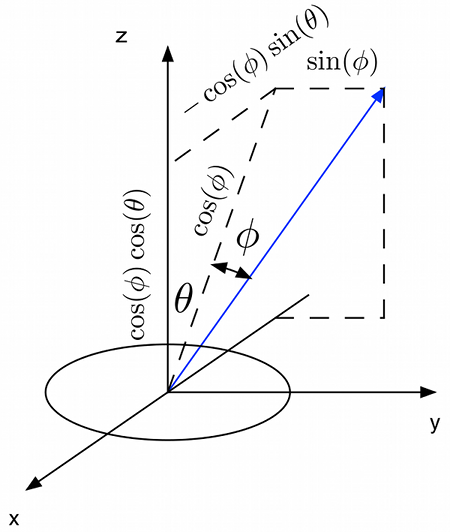

In [1]:
%matplotlib
import numpy as np
import sympy as S

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
Image("angle_definitions.png")

In [2]:
def plot_vector(r):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    r0 = (0., 0., 0.)
    ax.quiver(*r0, *r)
    ax.set_xlim([-1, 1.])
    ax.set_ylim([-1, 1.])
    ax.set_zlim([-1, 1.])
def plot_points(x,y,z, xlim = [-1.,1.], ylim = [-1.,1.], zlim = [-1., 1.]):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z, '.')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_zlim(zlim)

def plot_lines(x,y,z, xlim = [-1.,1.], ylim = [-1.,1.], zlim = [-1., 1.]):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x, y, z)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_zlim(zlim)



In [3]:
# setup rotation matrices
# rotation around x-axis by x
Rx = lambda x: S.Matrix([[1,0,0],[0, S.cos(x), -S.sin(x)], [0, S.sin(x), S.cos(x)]])


# rotation around y-axis by x
Ry = lambda x: S.Matrix([[S.cos(x),0, S.sin(x)],[0, 1, 0], [-S.sin(x), 0 , S.cos(x)]])

# rotation around z-axis by x
Rz = lambda x: S.Matrix([[S.cos(x),-S.sin(x),0], [S.sin(x), S.cos(x), 0], [0, 0, 1]])


# Total transformation from local detector system to local probe system
def T(t,p):
    return Ry(-t)*Rx(-p)

# Probe arm rotation: roation around x-axis by alpha
Rr = lambda x: S.Matrix([[1,0,0],[0, S.cos(x), -S.sin(x)], [0, S.sin(x), S.cos(x)]])

In [4]:
# velocity vector
vx, vy, vz = S.symbols('v_x v_y v_z')
v = S.Matrix([[vx, vy, vz]]).T

In [5]:
# calculate rotation matrices for special cases
# examples

vt = S.Matrix([0,0,1])   # unitvector along z-axis
# example1
th = S.pi/2
ph = 0
vl = T(th, ph)*vt
vl

Matrix([
[-1],
[ 0],
[ 0]])

In [6]:
plot_vector(vl)

In [7]:
th = S.pi/2
ph = S.pi/4
vl = T(th, ph)*vt
vl

Matrix([
[-sqrt(2)/2],
[ sqrt(2)/2],
[         0]])

In [8]:
plot_vector(vl)

In [9]:
vlr = Rr(-S.pi/2)*vl
vlr

Matrix([
[-sqrt(2)/2],
[         0],
[-sqrt(2)/2]])

In [10]:
plot_vector(vlr)

In [11]:
th = S.pi/4
ph = S.pi/4
T(th, ph)*vt

Matrix([
[     -1/2],
[sqrt(2)/2],
[      1/2]])

In [12]:
th = S.pi/4
ph = S.pi/4
T(th, ph)*vt


# transformation to overall coord. system
th = S.pi/4
ph = S.pi/4
vl = T(th, ph)*vt # vector in local coordinate sysem

v_g = Rz(S.pi/2)*vl

In [13]:
theta, phi, Phi, alpha = S.symbols('theta phi Phi alpha')

In [14]:
Rx(theta)

Matrix([
[1,          0,           0],
[0, cos(theta), -sin(theta)],
[0, sin(theta),  cos(theta)]])

In [15]:
Rz(Phi)

Matrix([
[cos(Phi), -sin(Phi), 0],
[sin(Phi),  cos(Phi), 0],
[       0,         0, 1]])

In [16]:
# Tranformation from detector to local no rotation
T(theta, phi)

Matrix([
[cos(theta),  sin(phi)*sin(theta), -sin(theta)*cos(phi)],
[         0,             cos(phi),             sin(phi)],
[sin(theta), -sin(phi)*cos(theta),  cos(phi)*cos(theta)]])

In [17]:
# RP Arm rotation (rotation around x-axis)
Rx(alpha)*T(theta, phi)

Matrix([
[            cos(theta),                                  sin(phi)*sin(theta),                                  -sin(theta)*cos(phi)],
[-sin(alpha)*sin(theta), sin(alpha)*sin(phi)*cos(theta) + cos(alpha)*cos(phi), -sin(alpha)*cos(phi)*cos(theta) + sin(phi)*cos(alpha)],
[ sin(theta)*cos(alpha), sin(alpha)*cos(phi) - sin(phi)*cos(alpha)*cos(theta),  sin(alpha)*sin(phi) + cos(alpha)*cos(phi)*cos(theta)]])

In [18]:
# Transformation from detector to global (offsets need to be added) included Arm rotation
Rz(Phi)*Rx(alpha)*T(theta,phi)

Matrix([
[sin(Phi)*sin(alpha)*sin(theta) + cos(Phi)*cos(theta), -sin(Phi)*sin(alpha)*sin(phi)*cos(theta) - sin(Phi)*cos(alpha)*cos(phi) + sin(phi)*sin(theta)*cos(Phi),  sin(Phi)*sin(alpha)*cos(phi)*cos(theta) - sin(Phi)*sin(phi)*cos(alpha) - sin(theta)*cos(Phi)*cos(phi)],
[sin(Phi)*cos(theta) - sin(alpha)*sin(theta)*cos(Phi),  sin(Phi)*sin(phi)*sin(theta) + sin(alpha)*sin(phi)*cos(Phi)*cos(theta) + cos(Phi)*cos(alpha)*cos(phi), -sin(Phi)*sin(theta)*cos(phi) - sin(alpha)*cos(Phi)*cos(phi)*cos(theta) + sin(phi)*cos(Phi)*cos(alpha)],
[                               sin(theta)*cos(alpha),                                                   sin(alpha)*cos(phi) - sin(phi)*cos(alpha)*cos(theta),                                                   sin(alpha)*sin(phi) + cos(alpha)*cos(phi)*cos(theta)]])

In [19]:
# sample random point. uniformly distributed
dtr = np.pi/180.
th_max = 90*dtr
cth = np.random.uniform(low = np.cos(th_max), high = 1., size = 1000)
th = np.arccos(cth)
ph = np.random.uniform( low = 0., high = 2.*np.pi, size = 1000)

x = np.sin(th)*np.cos(ph)
y = np.sin(th)*np.sin(ph)
z = np.cos(th)

plot_points(x,y,z)




In [20]:
# sunflower on a shpere

num_pts = 1000

#indices = np.arange(0, num_pts, dtype=float) + 0.5
#arg = 1 - 2*indices/num_pts
th_max = 180*dtr

arg = np.linspace(np.cos(th_max), 1., num_pts)
indices = np.arange(num_pts, dtype = float) + 0.5

# total solid angle
A = 2.*np.pi*(1. - np.cos(th_max))
# solid angle per point
dA = A/num_pts


theta = np.arccos(arg)
phi = 2.*np.pi * (1 + 5**0.5)/2. * indices  # (1 + np.sqrt(5)) = phi Fibonacci ratio

x, y, z = np.cos(phi) * np.sin(theta), np.sin(phi) * np.sin(theta), np.cos(theta);

plot_points(x,y,z)

In [21]:
th_mod = theta%(2*np.pi)
th_s = np.argsort(th_mod)
xs = phi[th_s]*np.cos(th_mod[th_s])
ys = phi[th_s]*np.sin(th_mod[th_s])

In [22]:
plt.plot(xs, ys)

In [23]:
# generating spiral
n_turns  = 10

phi = np.linspace(0., n_turns*2.*np.pi, 1000)
theta = np.arccos(np.linspace(1., -1., 1000))

x = np.sin(theta)*np.cos(phi)
y = np.sin(theta)*np.sin(phi)
z = np.cos(theta)

plot_lines(x,y,z)

In [24]:
(1. + np.sqrt(5))/2.

1.618033988749895

In [25]:
t, T = S.symbols('t T')
T = 2*S.pi
# calculate intgerals of trig. powers
S.integrate(S.cos(t)**4*S.sin(t),(t, 0., S.pi))

2/5

In [26]:
S.integrate(S.cos(t)**2*S.sin(t),(t, 0., S.pi))

2/3

In [27]:
# calculate averages
1/T*S.integrate(S.cos(t)**2,(t, 0., T))

1/2

In [28]:
1/T*S.integrate(S.cos(t)**4,(t, 0., T))

3/8

In [29]:
1/T*S.integrate(S.cos(t)**6,(t, 0., T))

5/16